<a href="https://colab.research.google.com/github/csch7/CSCI-4170/blob/main/Homework-02/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Classifiers

## Author: Colin Scherer

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score
import sklearn.tree as tree
import pandas as pd
from sys import stderr
import time
from google.colab import drive
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
from tensorflow.python.ops.parallel_for.gradients import jacobian


drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Cardiovascular_Disease_Dataset.csv")
ids = df.pop('patientid')
target = np.array(df.pop('target'))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Visualizing Decision trees:**

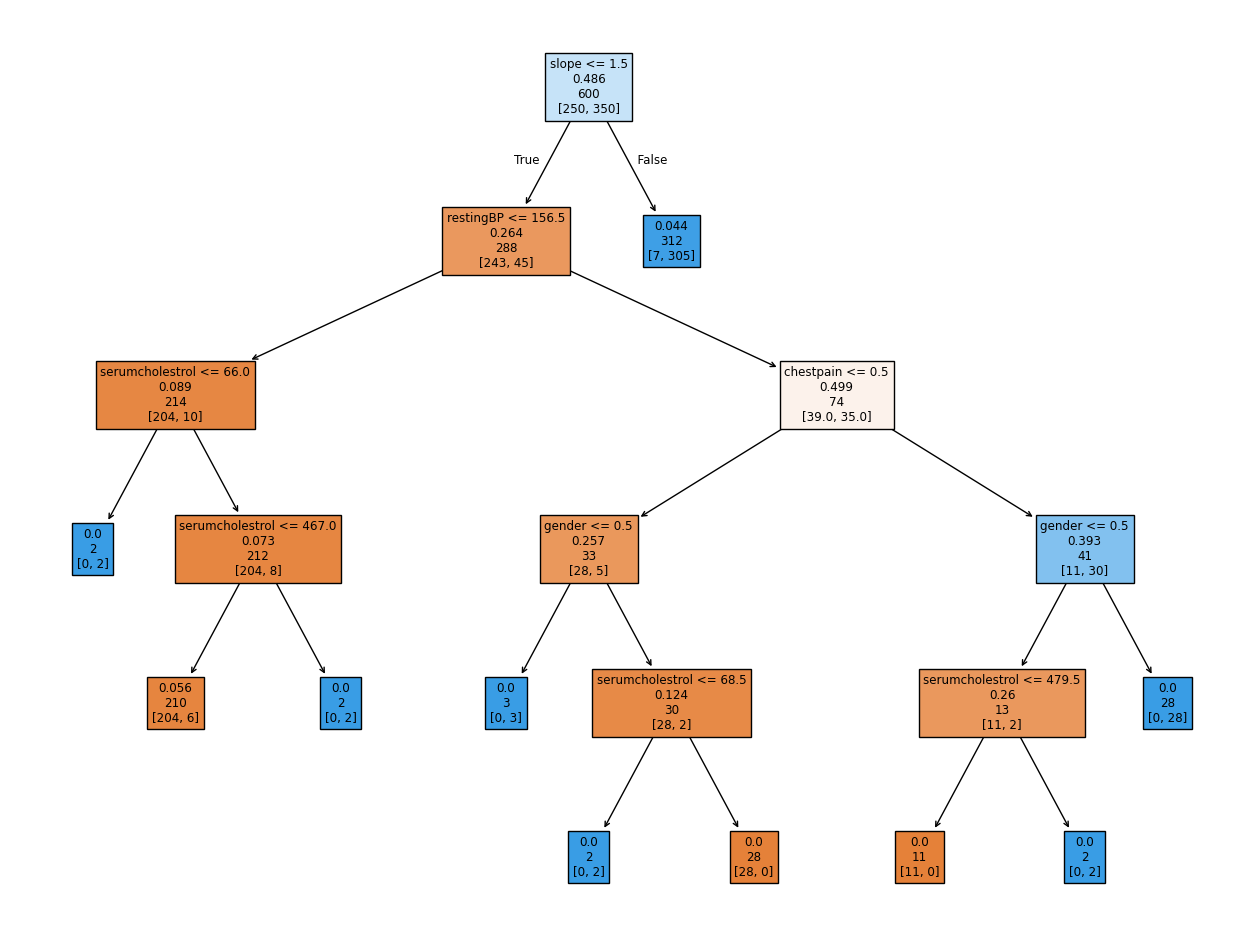

0.9714285714285714


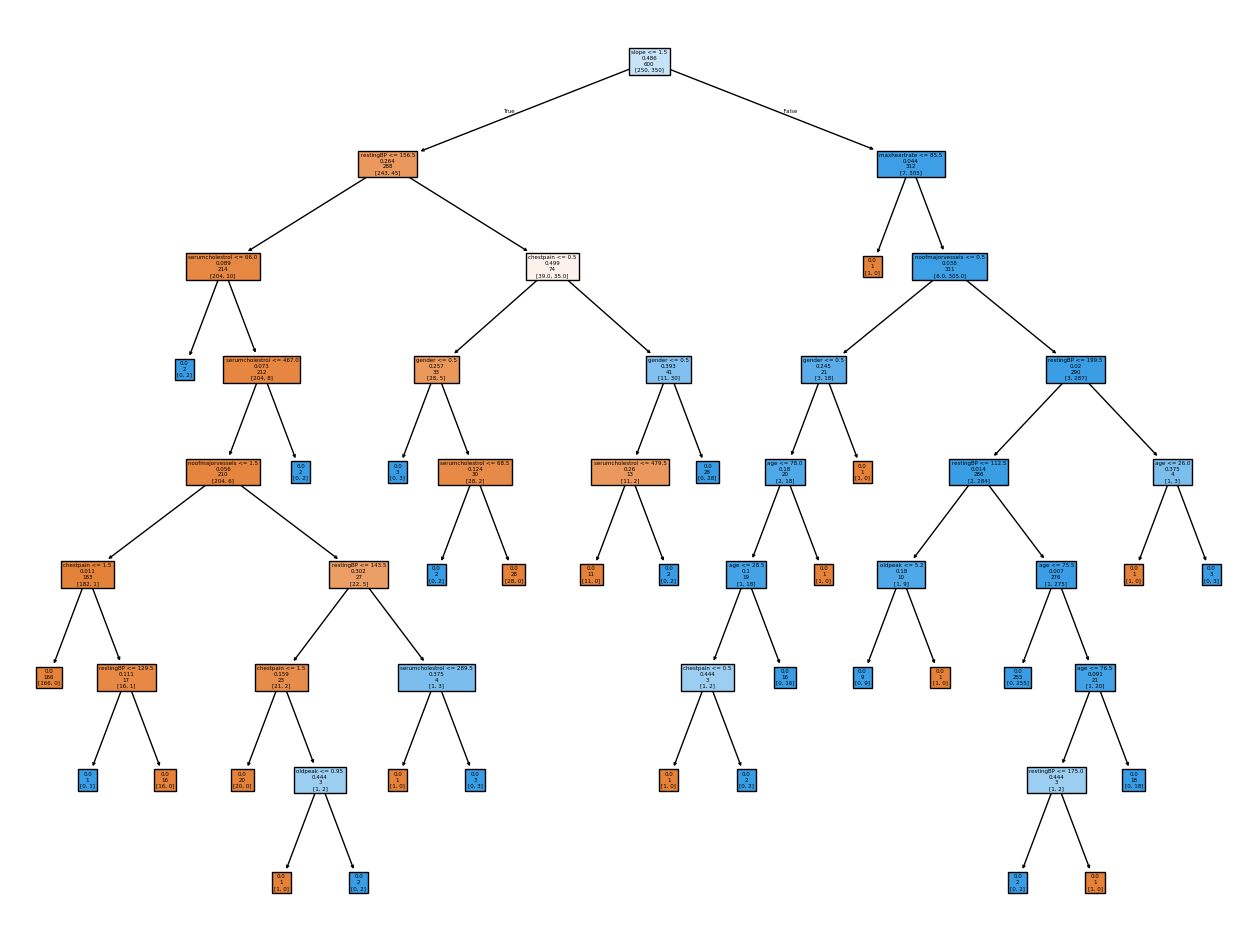

0.959349593495935


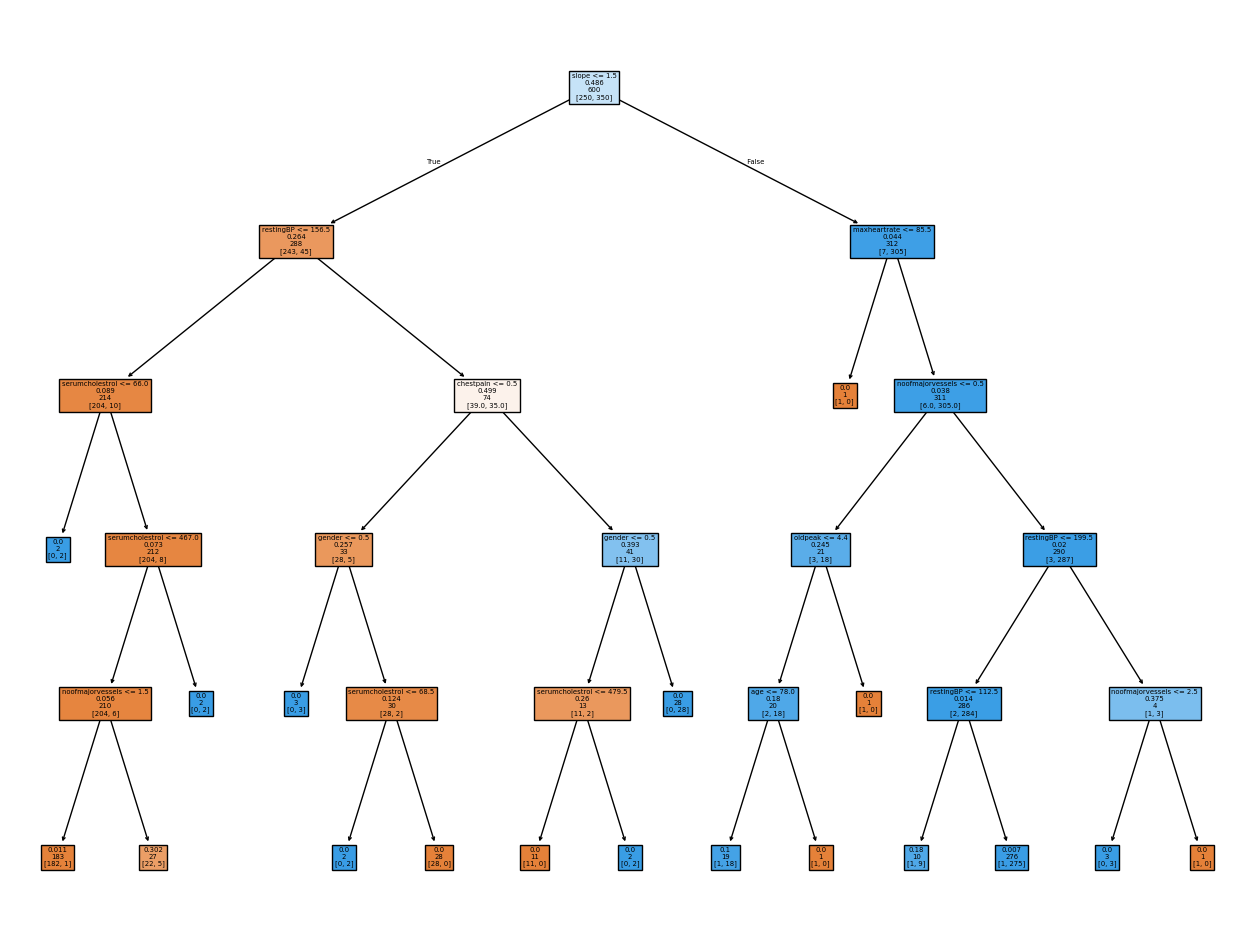

0.9754098360655737


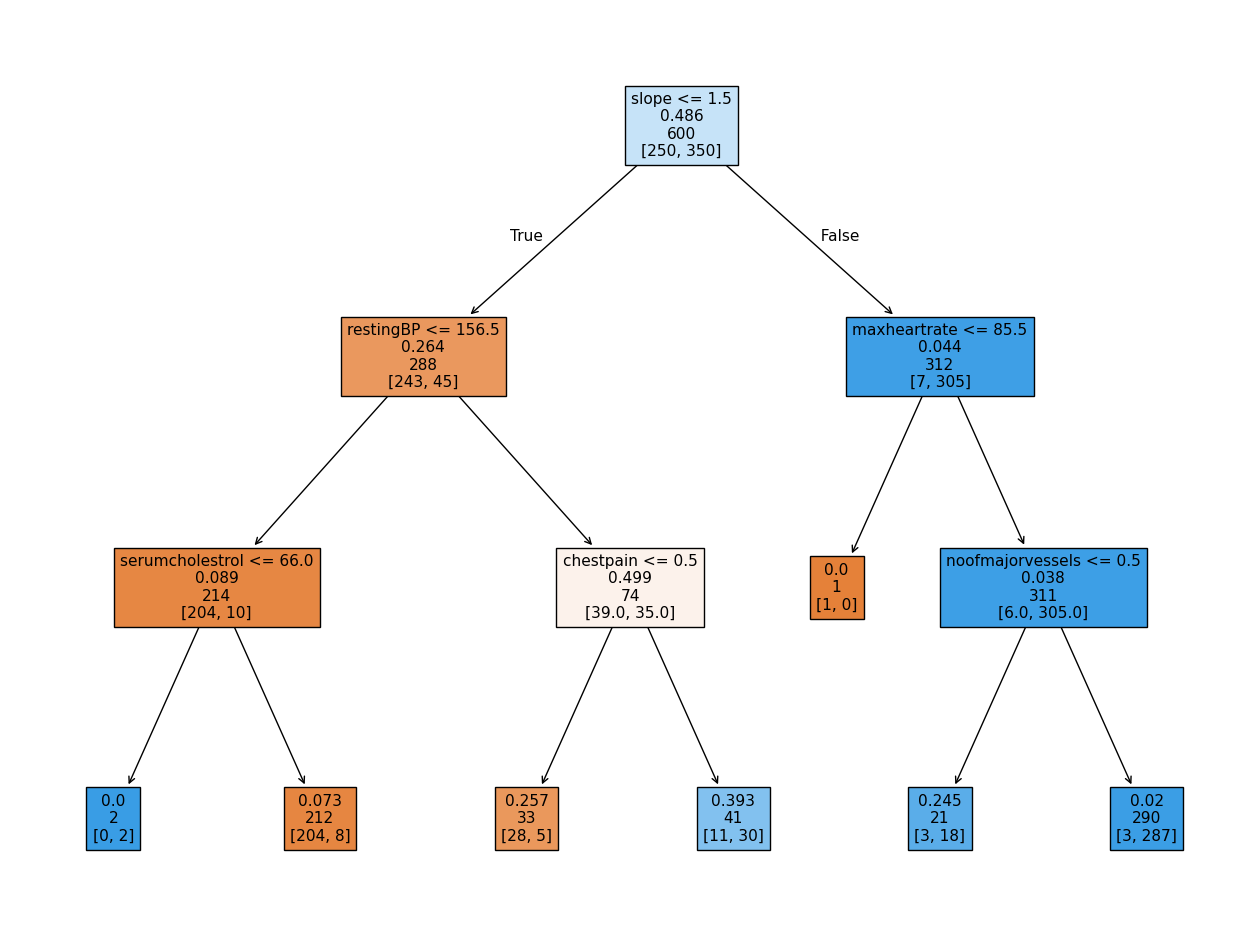

0.9382716049382716


In [100]:
np.random.shuffle(np.array(df))
train_data = np.array(df[:int(df.shape[0]*0.6)])
train_target = target[:int(df.shape[0]*0.6)]
valid_data = np.array(df[int(df.shape[0]*0.6):int(df.shape[0]*0.8)])
valid_target = np.array(target[int(df.shape[0]*0.6):int(df.shape[0]*0.8)])
test_data = np.array(df[int(df.shape[0]*0.8):])
test_target = np.array(target[int(df.shape[0]*0.8):])

clf = tree.DecisionTreeClassifier(max_depth=8, ccp_alpha=0.005)
clf.fit(train_data, train_target)
plt.figure(figsize=(16, 12))
tree.plot_tree(clf, label="none", feature_names = df.columns, filled = True)
plt.show()
print(f1_score(test_target, clf.predict(test_data)))

clf = tree.DecisionTreeClassifier(max_depth=8)
clf.fit(train_data, train_target)
plt.figure(figsize=(16, 12))
tree.plot_tree(clf, label="none", feature_names = df.columns, filled = True)
plt.show()
print(f1_score(test_target, clf.predict(test_data)))

clf = tree.DecisionTreeClassifier(max_depth=5)
clf.fit(train_data, train_target)
plt.figure(figsize=(16, 12))
tree.plot_tree(clf, label="none", feature_names = df.columns, filled = True)
plt.show()
print(f1_score(test_target, clf.predict(test_data)))
f1_original = f1_score(test_target, clf.predict(test_data))

clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(train_data, train_target)
plt.figure(figsize=(16, 12))
tree.plot_tree(clf, label="none", feature_names = df.columns, filled = True)
plt.show()
print(f1_score(test_target, clf.predict(test_data)))

Changing the maximum depth restricts how deep the tree is able to go -- with smaller values, this means that some leaf nodes can have large amounts of inputs left, meaning not all possibilities are explored. While this is good for reducing overfitting, small values for depth tend to underfit instead. I also tested setting the "ccp_alpha" term, the alpha for minimum cost-complexity pruning. I set this to $0.005$: this was determined through trial and error, visualizing how the tree structure changed as alpha is altered. After settling on a good value for alpha, pruning changes the structure of the decision tree dramatically. After pruning, the tree appears both not as deep and less balanced.

### **Sensitivity Analysis:**

In [126]:

# Sensitivity analysis for slope
scores = []
for run in range(30):
  df_slope_grad = np.array(train_data)
  delta = ((max(df_slope_grad[:,-2])-min(df_slope_grad[:,-2]))/5)
  df_slope_grad[:,-2] += delta

  clf = tree.DecisionTreeClassifier(max_depth=5)
  clf.fit(df_slope_grad, train_target)
  scores.append(f1_score(test_target, clf.predict(test_data)))
for run in range(30):
  df_slope_grad = np.array(train_data)
  delta = ((max(df_slope_grad[:,-2])-min(df_slope_grad[:,-2]))/5)
  df_slope_grad[:,-2] -= delta

  clf = tree.DecisionTreeClassifier(max_depth=5)
  clf.fit(df_slope_grad, train_target)
  scores.append(f1_score(test_target, clf.predict(test_data)))
print("Difference in f1 score for slope:",f1_original - np.mean(scores))

# Sensitivity analysis for no_major_blood_vessels
scores = []
for run in range(30):
  df_slope_grad = np.array(train_data)
  delta = ((max(df_slope_grad[:,-1])-min(df_slope_grad[:,-1]))/5)
  df_slope_grad[:,-1] += delta

  clf = tree.DecisionTreeClassifier(max_depth=5)
  clf.fit(df_slope_grad, train_target)
  scores.append(f1_score(test_target, clf.predict(test_data)))
for run in range(30):
  df_slope_grad = np.array(train_data)
  delta = ((max(df_slope_grad[:,-1])-min(df_slope_grad[:,-1]))/5)
  df_slope_grad[:,-1] -= delta

  clf = tree.DecisionTreeClassifier(max_depth=5)
  clf.fit(df_slope_grad, train_target)
  scores.append(f1_score(test_target, clf.predict(test_data)))
print("Difference in f1 score for number of major blood vessels:",f1_original - np.mean(scores))

# Sensitivity analysis for restingBP
scores = []
for run in range(30):
  df_slope_grad = np.array(train_data)
  delta = ((max(df_slope_grad[:,3])-min(df_slope_grad[:,3]))/5)
  df_slope_grad[:,3] += delta

  clf = tree.DecisionTreeClassifier(max_depth=5)
  clf.fit(df_slope_grad, train_target)
  scores.append(f1_score(test_target, clf.predict(test_data)))
for run in range(30):
  df_slope_grad = np.array(train_data)
  delta = ((max(df_slope_grad[:,3])-min(df_slope_grad[:,3]))/5)
  df_slope_grad[:,3] -= delta

  clf = tree.DecisionTreeClassifier(max_depth=5)
  clf.fit(df_slope_grad, train_target)
  scores.append(f1_score(test_target, clf.predict(test_data)))
print("Difference in f1 score for resting blood pressure:",f1_original - np.mean(scores))


Difference in f1 score for slope: 0.0989173501821482
Difference in f1 score for number of major blood vessels: 0.05332226588893041
Difference in f1 score for resting blood pressure: 0.0376941897928087


Sensitivity analysis generally refers how the output changes given a small perturbation in the input, or the partial derivative of the output with respect to an input feature. Above, I've implemented a variation of this, both increasing and decreasing each feature by $\frac{range(feature)}{5}$, then averaging the f1 score over 30 runs. Then, the change of the f1 score with respect to the original non-modified f1 score is taken and reported. From the reported results, a change in slope decreases the f1 score by almost 0.1, a change in number of major blood vessels decreases the f1 score by 0.053, and a change in the resting blood pressure decreases the f1 score by 0.038. Between these three features, slope seems to have the most impact on the output, which makes sense, considering it is the root node of the decision trees.

References:
- https://journalofbigdata.springeropen.com/articles/10.1186/s40537-021-00515-w#:~:text=Sensitivity%20analysis%20examines%20the%20change,the%20input%20feature%20are%20evaluated.

- https://en.wikipedia.org/wiki/Sensitivity_analysis

### **Bagging and Boosting Ensemble Methods**

Below, I perform stratified {5,10,15}-fold cross-validation on a bagging classifier, and evaluated using the means and standard deviations of f1, recall, and precision scores.

In [3]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

clf = BaggingClassifier(n_estimators = 50)
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)
n_scores_f1 = cross_val_score(clf, np.array(df), target, scoring = 'f1', cv = skf)
n_scores_recall = cross_val_score(clf, np.array(df), target, scoring = 'recall', cv = skf)
n_scores_precision = cross_val_score(clf, np.array(df), target, scoring = 'precision', cv = skf)

print("Mean, STD of f1 scores with 5 folds: {:.5f}, {:.5f}".format(np.mean(n_scores_f1), np.std(n_scores_f1)))
print("Mean, STD of recall scores with 5 folds: {:.5f}, {:.5f}".format(np.mean(n_scores_recall), np.std(n_scores_recall)))
print("Mean, STD of precision scores with 5 folds: {:.5f}, {:.5f}".format(np.mean(n_scores_precision), np.std(n_scores_precision)))


skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)
n_scores_f1 = cross_val_score(clf, np.array(df), target, scoring = 'f1', cv = skf)
n_scores_recall = cross_val_score(clf, np.array(df), target, scoring = 'recall', cv = skf)
n_scores_precision = cross_val_score(clf, np.array(df), target, scoring = 'precision', cv = skf)
print("Mean, STD of f1 scores with 10 folds: {:.5f}, {:.5f}".format(np.mean(n_scores_f1), np.std(n_scores_f1)))
print("Mean, STD of recall scores with 10 folds: {:.5f}, {:.5f}".format(np.mean(n_scores_recall), np.std(n_scores_recall)))
print("Mean, STD of precision scores with 10 folds: {:.5f}, {:.5f}".format(np.mean(n_scores_precision), np.std(n_scores_precision)))


skf = StratifiedKFold(n_splits = 15, shuffle = True, random_state = 1)
n_scores_f1 = cross_val_score(clf, np.array(df), target, scoring = 'f1', cv = skf)
n_scores_recall = cross_val_score(clf, np.array(df), target, scoring = 'recall', cv = skf)
n_scores_precision = cross_val_score(clf, np.array(df), target, scoring = 'precision', cv = skf)
print("Mean, STD of f1 scores with 15 folds: {:.5f}, {:.5f}".format(np.mean(n_scores_f1), np.std(n_scores_f1)))
print("Mean, STD of recall scores with 15 folds: {:.5f}, {:.5f}".format(np.mean(n_scores_recall), np.std(n_scores_recall)))
print("Mean, STD of precision scores with 15 folds: {:.5f}, {:.5f}".format(np.mean(n_scores_precision), np.std(n_scores_precision)))


Mean, STD of f1 scores with 5 folds: 0.98190, 0.00791
Mean, STD of recall scores with 5 folds: 0.97931, 0.00879
Mean, STD of precision scores with 5 folds: 0.98279, 0.00758
Mean, STD of f1 scores with 10 folds: 0.97933, 0.01298
Mean, STD of recall scores with 10 folds: 0.98103, 0.01800
Mean, STD of precision scores with 10 folds: 0.97815, 0.01977
Mean, STD of f1 scores with 15 folds: 0.98108, 0.01685
Mean, STD of recall scores with 15 folds: 0.97764, 0.01856
Mean, STD of precision scores with 15 folds: 0.97819, 0.02187


Below, I perform stratified {5,10,15}-fold cross-validation on the AdaBoost classifier, and evaluated using the means and standard deviations of f1, recall, and precision scores.

In [4]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier()
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)
n_scores_f1 = cross_val_score(clf, np.array(df), target, scoring = 'f1', cv = skf)
n_scores_recall = cross_val_score(clf, np.array(df), target, scoring = 'recall', cv = skf)
n_scores_precision = cross_val_score(clf, np.array(df), target, scoring = 'precision', cv = skf)
print("Mean, STD of f1 scores with 5 folds: {:.5f}, {:.5f}".format(np.mean(n_scores_f1), np.std(n_scores_f1)))
print("Mean, STD of recall scores with 5 folds: {:.5f}, {:.5f}".format(np.mean(n_scores_recall), np.std(n_scores_recall)))
print("Mean, STD of precision scores with 5 folds: {:.5f}, {:.5f}".format(np.mean(n_scores_precision), np.std(n_scores_precision)))

skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)
n_scores_f1 = cross_val_score(clf, np.array(df), target, scoring = 'f1', cv = skf)
n_scores_recall = cross_val_score(clf, np.array(df), target, scoring = 'recall', cv = skf)
n_scores_precision = cross_val_score(clf, np.array(df), target, scoring = 'precision', cv = skf)
print("Mean, STD of f1 scores with 10 folds: {:.5f}, {:.5f}".format(np.mean(n_scores_f1), np.std(n_scores_f1)))
print("Mean, STD of recall scores with 10 folds: {:.5f}, {:.5f}".format(np.mean(n_scores_recall), np.std(n_scores_recall)))
print("Mean, STD of precision scores with 10 folds: {:.5f}, {:.5f}".format(np.mean(n_scores_precision), np.std(n_scores_precision)))


skf = StratifiedKFold(n_splits = 15, shuffle = True, random_state = 1)
n_scores_f1 = cross_val_score(clf, np.array(df), target, scoring = 'f1', cv = skf)
n_scores_recall = cross_val_score(clf, np.array(df), target, scoring = 'recall', cv = skf)
n_scores_precision = cross_val_score(clf, np.array(df), target, scoring = 'precision', cv = skf)
print("Mean, STD of f1 scores with 15 folds: {:.5f}, {:.5f}".format(np.mean(n_scores_f1), np.std(n_scores_f1)))
print("Mean, STD of recall scores with 15 folds: {:.5f}, {:.5f}".format(np.mean(n_scores_recall), np.std(n_scores_recall)))
print("Mean, STD of precision scores with 15 folds: {:.5f}, {:.5f}".format(np.mean(n_scores_precision), np.std(n_scores_precision)))

Mean, STD of f1 scores with 5 folds: 0.97766, 0.00824
Mean, STD of recall scores with 5 folds: 0.97931, 0.00422
Mean, STD of precision scores with 5 folds: 0.97605, 0.01238
Mean, STD of f1 scores with 10 folds: 0.97597, 0.01520
Mean, STD of recall scores with 10 folds: 0.97931, 0.02011
Mean, STD of precision scores with 10 folds: 0.97310, 0.02179
Mean, STD of f1 scores with 15 folds: 0.97852, 0.01453
Mean, STD of recall scores with 15 folds: 0.97935, 0.02138
Mean, STD of precision scores with 15 folds: 0.97814, 0.01978


The performance using AdaBoost or Bagging doesn't seem to change significantly with differing metrics although overall, AdaBoost seems to perform minutely worse. I think that the dataset I've chosen is too easy, which means that boosting and bagging both improve the model to almost its maximum potential for this dataset, as all the metrics are very close to 1.

### **Comparing Models:**

Confusion matrices for bagging and adaboost with stratified 15-fold cross-validation are shown below.

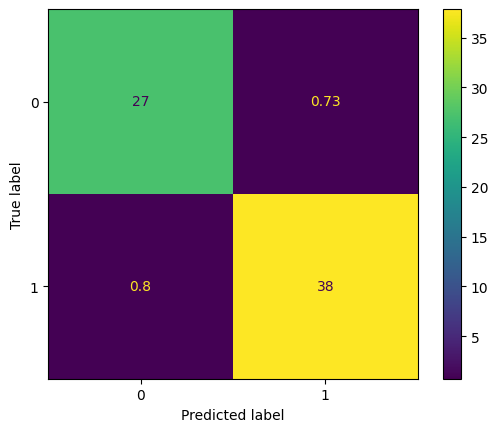

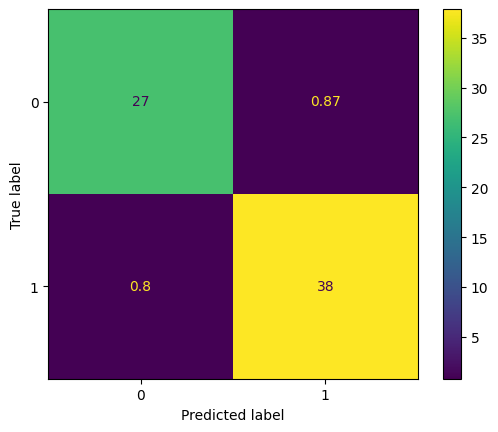

In [5]:
number_folds = 15

skf = StratifiedKFold(n_splits = number_folds, shuffle = True, random_state = 1)
mats1 = np.zeros((number_folds, 2,2))
errs1 = []
mats2 = np.zeros((number_folds, 2,2))
errs2 = []
for i, (train_index, test_index) in enumerate(skf.split(np.array(df), target)):
  clfBag = BaggingClassifier(n_estimators = 50)
  clfAda = AdaBoostClassifier(n_estimators = 50)
  clfBag.fit(np.array(df)[train_index], target[train_index])
  mats1[i] = confusion_matrix(target[test_index], clfBag.predict(np.array(df)[test_index]))
  errs1.append(target[test_index]-clfBag.predict(np.array(df)[test_index]))
  clfAda.fit(np.array(df)[train_index], target[train_index])
  mats2[i] = confusion_matrix(target[test_index], clfAda.predict(np.array(df)[test_index]))
  errs2.append(target[test_index]-clfAda.predict(np.array(df)[test_index]))
disp = ConfusionMatrixDisplay(np.mean(mats1, axis=0))
disp.plot()
plt.show()
disp = ConfusionMatrixDisplay(np.mean(mats2, axis=0))
disp.plot()
plt.show()


Below, the models are compared using a binomial test, which is better than the paired t-test when using the same test set (since the paired t-test assumes each test set is independent). The methodology of using a binomial test and downsides of the paired t-test were found in [this paper](https://www.cs.ru.nl/~tomh/onderwijs/lrs/lrs_files/salzberg97comparing.pdf).

In [10]:
from scipy.stats import binomtest


num_bag_correct = 0
num_ada_correct = 0

for fold in range(len(errs1)):
  a1 = abs(errs1[fold])
  a2 = abs(errs2[fold])
  num_bag_correct += len(a1)-np.count_nonzero(a1-a2+1) # Count the number of test points bagging got correct that adaboost didn't
  num_ada_correct += len(a1)-np.count_nonzero(a1-a2-1) # Count the number of test points adaboost got correct that bagging didn't

print(num_bag_correct)
print(num_ada_correct)

print(binomtest(k=num_bag_correct, n = num_bag_correct + num_ada_correct))


15
13
BinomTestResult(k=15, n=48, alternative='two-sided', statistic=0.3125, pvalue=0.01328328156224501)


The returned p-value is essentially the probability that the models are the same for this given dataset. Since $p=0.85>0.05$, we cannot reject the null hypothesis that both models are the same, and it is highly likely that they are the same (for this dataset). This means that the slight differences in the models are not significant, which is expected to me given how small they are.

As I have mentioned before, there are no real differences in bias or variance in either of these models for this dataset, because there is such minimal error. To elaborate more on what we should be seeing, bagging should reduce variance -- many weak learners are averaged, which will shrink the probability distribution towards the mean. On the other hand, boosting should reduce bias -- weak learners are sequentially evaluated, with weight updates being tipped towards difficult data points; this will reduce the error, but ultimately could complicate the model more. The ensemble method selected should therefore depend on the weakest aspects of your existing model -- choose a bagging method if your variance is high, and choose a boosting method if your bias is high. (Referenced: https://www.geeksforgeeks.org/bagging-vs-boosting-in-machine-learning/)